<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <p class="h1" style="color:blue; text-align:center">Classifiez automatiquement des biens de consommation <br/></p>
   </div>   

 <p>
L’entreprise <a> "Place de marché”</a>, souhaite lancer une marketplace e-commerce. Sur celle-ci, des vendeurs proposent des articles à des acheteurs en postant une photo et une description. Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle, place de marché aimerais donc automatiser cette tâche. Elle fait donc appel à nous pour étudier la faisabilité d'un <a style="color:red">moteur de classification des articles</a> en différentes catégories, avec un niveau de précision suffisant.
 </p>
      
      
Notre mission est donc de réaliser une première étude de faisabilité d'un moteur de classification d'articles, basé sur une <b>image</b>  et une <b>description</b>, pour l'automatisation de l'attribution de la <a> catégorie de l'article</a>.


Nous allons analyser le jeu de données en réalisant un <b>prétraitement</b> des descriptions des produits et des images, une <b>réduction de dimension</b> , puis un <b>clustering</b>. 
                  
                  
 <a class="btn btn-primary btn-lg" href=" https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce" role="button">Jeu de données</a>
  <hr class="my-4">
   
  </div>
</div>

<p class="h2"; style="color:white; text-align:center; background-color:blue"> 0. Mission et Compétences évaluées à l'issue du Projet </p>



<h2 style="color:green; text-align:left;"> Mission à réaliser </h2>

Les **résultats de la réduction de dimension et du clustering** seront :

- Présenter sous la forme de graphiques en deux dimensions, et 
- Confirmés par un calcul de similarité entre les catégories réelles et les clusters. 
- Ceux-ci illustreront le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.


Une approche de modélisation et la faisabilité de regrouper automatiquement des produits de même catégorie.


<h2 style="color:green; text-align:left;"> Pistes de Reflexion  </h2>

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
- Deux approches de type “**bag-of-words**”, comptage simple de mots et **Tf-idf** ;
- une approche de type word/**sentence embedding** classique avec **Word2Vec** (ou **Glove** ou **FastText**) ;
- une approche de type word/**sentence embedding** avec **BERT** ;
- une approche de type word/**sentence embedding** avec **USE** (Universal Sentence Encoder). 
 

<p class="h2"; style="color:white; text-align:center; background-color:blue">  Mise en Place de l'environnement de Travail  </p>

Nous avons une variété de bibliothèques pour le traitement des données. Python offre des fonctionnalités complètes ainsi que de puissantes bibliothèques statistiques et numériques pour l'analyse de données : **Numpy, Pandas and Matplolib**.

- **NumPy** est une bibliothèque Python qui offre des fonctionnalités comparables à celles d’outils mathématiques comme MATLAB et R et propose donc des fonctions mathématiques complète
- **Pandas** est une bibliothèque Python extrêmement populaire pour l’analyse et la manipulation de données. C’est l’équivalent d’Excel pour Python, car elle fournit des fonctionnalités faciles à utiliser pour les tables de données. Par exemple Pandas peut ouvrir des fichiers texte ( .csv ) et les sauvegarder de facon structurer dans des tables appelés  **DataFrame**.
- NumPy et Pandas simplifient l’analyse et la manipulation de données.
- Matplotlib fournit des visualisations des données attrayantes.

#### Import Lirairies

In [1]:
# Import des librairies utiles à l'analyse exploratoire
# **Importation des librairies Python nécessaires**

import os, sys, time

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from IPython.display import display

#### Graphics options

In [2]:
sns.set()

In [2]:
# Affichage d'un maximum de les lignes et colonnes
pd.set_option('display.max_column', 200)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 300)

#chiffre après la virgule
pd.set_option('display.precision', 5)

In [3]:
# Affichage des erreurs
import warnings
warnings.filterwarnings("ignore")

<p class="h2"; style="color:white; text-align:center; background-color:blue"> 2. Chargement et Presentation du Jeu de données  </p>

#### Loading Data

In [4]:
# Importing the differents dataset released by Olist
ecommerce_sample = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv", delimiter=',',header='infer')

#### First Tour 

In [5]:
# Fonction permettant d'avoir une description du dataset

def dataset_overview(df):
    ''' function taking a dataframe in input and prints a dataframe summary containing
    number of rows, columns, missing cells and duplicate rows'''
    
    print('******** Dataset Overview *****\n')
    
    print ('Shape of the Dataset : {}'.format(df.shape))
    print ('Number of variables : {}'.format(df.shape[1]))
    print (' - Num. Quantitative variables : {}'.format(len(df.select_dtypes(include=["float64","int64"]).columns)))
    print (' - Num. Qualitative variables : {}'.format(len(df.select_dtypes(include=["object"]).columns)))
    print ('Number of obervations : {}'.format(df.shape[0]))
    print ('Number of cells : {}'.format(df.size))
    print ('Missing cells : {}'.format(df.isna().sum().sum()))
    print ('Missing cells in % : {:.2%}'.format(df.isna().sum().sum()/(df.size)))
    print ('Duplicate rows : {}'.format(len(df)-len(df.drop_duplicates())))
    print ('Duplicate rows in % : {:.4%}'.format((len(df)-len(df.drop_duplicates())) / (df.shape[0])))
    print("\n************** End ************")

dataset_overview(ecommerce_sample)

******** Dataset Overview *****

Shape of the Dataset : (1050, 15)
Number of variables : 15
 - Num. Quantitative variables : 2
 - Num. Qualitative variables : 12
Number of obervations : 1050
Number of cells : 15750
Missing cells : 341
Missing cells in % : 2.17%
Duplicate rows : 0
Duplicate rows in % : 0.0000%

************** End ************


In [6]:
df = ecommerce_sample.copy()

#### 2.1 Display Data

In [7]:
pd.set_option('display.max_colwidth', 20)

df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d4...,2016-04-30 03:22...,http://www.flipk...,Elegance Polyest...,"[""Home Furnishin...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d4...,False,Key Features of ...,No rating available,No rating available,Elegance,"{""product_specif..."
1,7b72c92c2f6c4026...,2016-04-30 03:22...,http://www.flipk...,Sathiyas Cotton ...,"[""Baby Care >> B...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c4026...,False,Specifications o...,No rating available,No rating available,Sathiyas,"{""product_specif..."
2,64d5d4a258243731...,2016-04-30 03:22...,http://www.flipk...,Eurospa Cotton T...,"[""Baby Care >> B...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731...,False,Key Features of ...,No rating available,No rating available,Eurospa,"{""product_specif..."
3,d4684dcdc759dd9c...,2016-06-20 08:49...,http://www.flipk...,SANTOSH ROYAL FA...,"[""Home Furnishin...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9c...,False,Key Features of ...,No rating available,No rating available,SANTOSH ROYAL FA...,"{""product_specif..."
4,6325b6870c54cd47...,2016-06-20 08:49...,http://www.flipk...,Jaipur Print Cot...,"[""Home Furnishin...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47...,False,Key Features of ...,No rating available,No rating available,Jaipur Print,"{""product_specif..."


In [8]:
df["category"] = df["product_category_tree"].apply(lambda x : x.split(">>")[0].split("\"")[1])

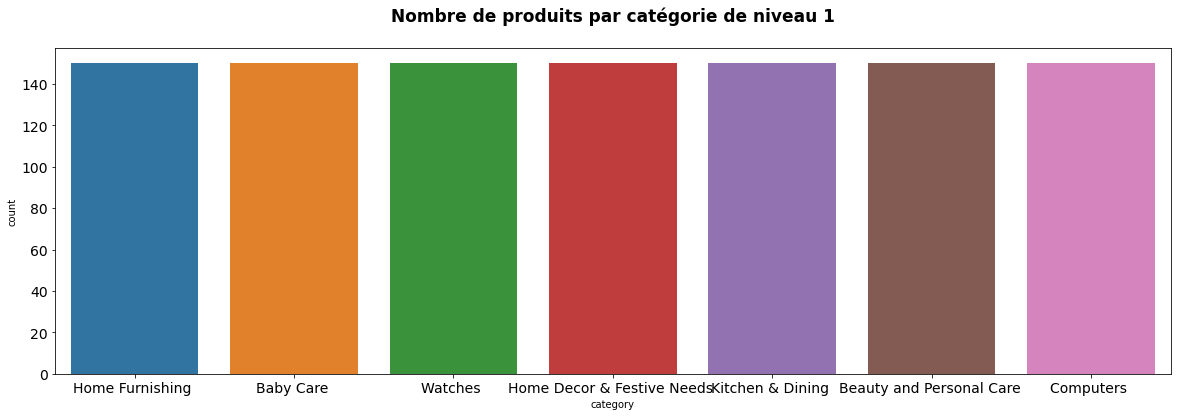

In [9]:
fig = plt.figure(figsize=(20, 6))
sns.countplot(data=df, x="category")

font_title = {"weight": "bold",
              "size": 17}

plt.yticks(size=14)
plt.xticks(size=14)
plt.title(f"Nombre de produits par catégorie de niveau 1\n",
          fontdict=font_title)
#plt.xlabel("product_category level 0", fontsize=14)
plt.show()

#### Variables à analyser

In [10]:
pd.set_option('display.max_colwidth', 50)
cols_images = ["product_name", "category", "image"]

df[cols_images].head()

,product_name,category,image
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Sathiyas Cotton Bath Towel,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Eurospa Cotton Terry Face Towel Set,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg


# Analyse et Pré-traitement des images via SIFT/ OBR


- Création des descripteurs par image et toutes images
- Création de clusters de descripteurs
- Créatio d'histogramme par image
- Reduction de dimension PCA/T-SNE
- Analyse visuelle : Affichage T-SNE selon les catégories d'images

#### Images Analysis

In [11]:
df_image = df[cols_images]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_image["category_code"] = le.fit_transform(df_image["category"])


df_image.sample(10)

,product_name,category,image,category_code
179,Rockmantra Beautiful Girl With Big Feather Hat...,Kitchen & Dining,aab46b84f70cc6774afaafe1d6035de3.jpg,5
401,Denim Deo Combo Set,Beauty and Personal Care,50be4cd92fda2755e1e884421a52e345.jpg,1
230,Sovam International Krishna With Cow Idol Show...,Home Decor & Festive Needs,968a2b3be84193e3f755c2fe71033a2c.jpg,3
810,Oxyglow Fruit Massage Cream With Vitamin-E & S...,Beauty and Personal Care,a1fa0e24b2249ffa81f688c4840f1eb8.jpg,1
949,Welhouse Geometric Double Blanket Black,Home Furnishing,f41761a931135c6c043c7e04abda41b0.jpg,4
798,Oxyglow Golden Glow Radiance Anti Acne Facial ...,Beauty and Personal Care,9993de7e2bcced43dc9edb3b2c81f23d.jpg,1
240,Kosher Kadhai 5 L,Kitchen & Dining,7e4c1d31e279a700c6b8e66d820e8601.jpg,5
614,Innovative Single Corner Stainless Steel Wall ...,Home Decor & Festive Needs,4589c5021b21525b4779260f7e86f355.jpg,3
182,Printland PMR1902 Ceramic Mug,Kitchen & Dining,3c4ca34c50a5437a1bcc42b72fc1351f.jpg,5
372,"Wild Stone Charge,Surge Combo Set",Beauty and Personal Care,ea82cb68a6e79d3c10fe9c4255c6a508.jpg,1


In [69]:
from os import listdir

path = "Flipkart/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1051


In [70]:
df_image.groupby("category_code").count()

,product_name,category,image
category_code,,,
0,150,150,150
1,150,150,150
2,150,150,150
3,150,150,150
4,150,150,150
5,150,150,150
6,150,150,150


In [71]:
list_categories = df_image["category"].unique().tolist()
list_categories

['Home Furnishing ',
 'Baby Care ',
 'Watches ',
 'Home Decor & Festive Needs ',
 'Kitchen & Dining ',
 'Beauty and Personal Care ',
 'Computers ']

In [72]:
set(df_image["category"])

{'Baby Care ',
 'Beauty and Personal Care ',
 'Computers ',
 'Home Decor & Festive Needs ',
 'Home Furnishing ',
 'Kitchen & Dining ',
 'Watches '}

In [73]:
df_image.category.unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [74]:
for j, categ in enumerate(df_image.category.unique()):
    print(j, categ) 

0 Home Furnishing 
1 Baby Care 
2 Watches 
3 Home Decor & Festive Needs 
4 Kitchen & Dining 
5 Beauty and Personal Care 
6 Computers 


In [ ]:
for mean, std, count, in zip(df.describe())

In [ ]:
#path = "Flipkart/Images/"

Sample category - Home Furnishing  :


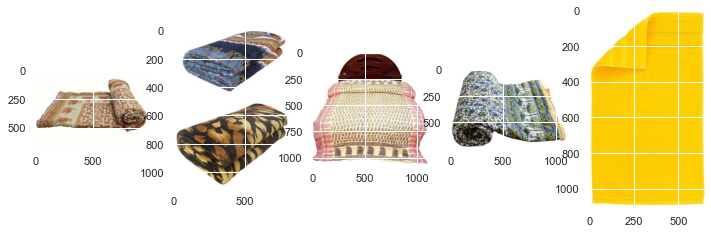

Sample category - Baby Care  :


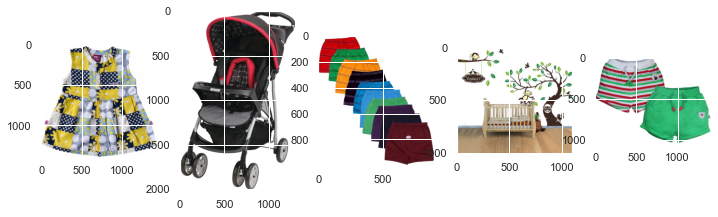

Sample category - Watches  :


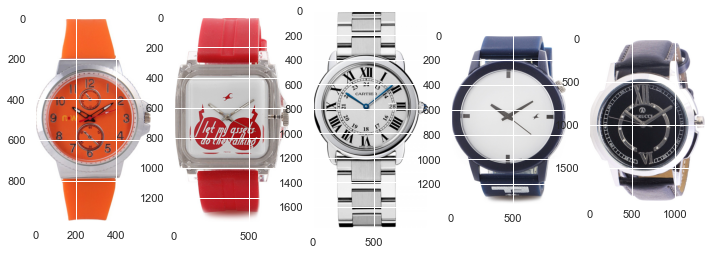

Sample category - Home Decor & Festive Needs  :


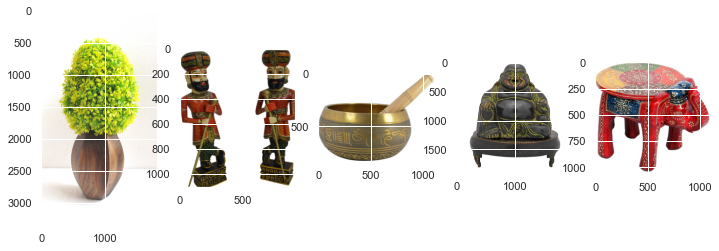

Sample category - Kitchen & Dining  :


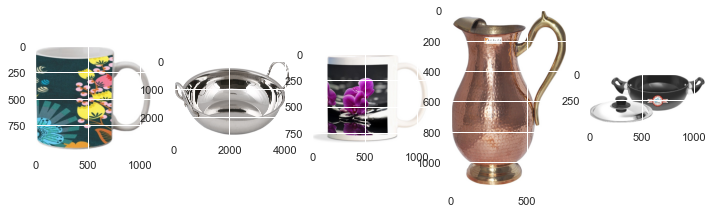

Sample category - Beauty and Personal Care  :


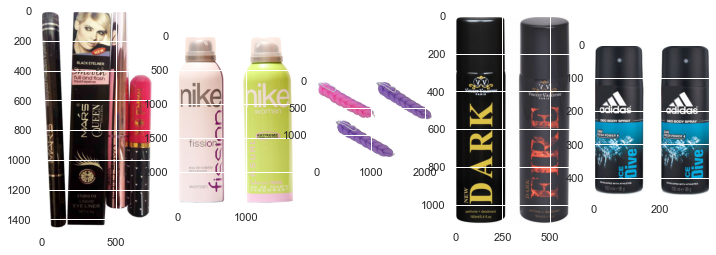

Sample category - Computers  :


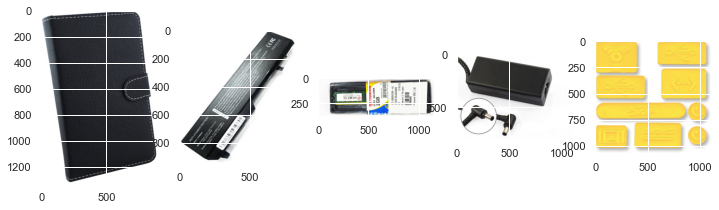

In [77]:
from matplotlib.image import imread

path = "Flipkart/Images/"
list_categories = df_image["category"].unique().tolist()

for category in list_categories:
    print('Sample category - {} :'.format(category))
    image_sample = df_image[df_image["category"] == category]["image"].sample(5)
    
    plt.figure(figsize=(12,4))
    for i in range(5):
        plt.subplot(150 + 1 + i)
        filename = path + image_sample.iloc[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [78]:
# identification of key points and associated descriptors
import time
import cv2 as cv
import numpy as np

sift_keypoints = []
temps1 = time.time()

sift = cv.SIFT_create(500)
all_images = path + df["image"]
#all_images_400 = all_images.sample(400)

for image_num in range(len(all_images)) :
    if image_num%100 == 0 : print(image_num)
    image = cv.imread(all_images[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1 = time.time() - temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :          2185.98 secondes


In [ ]:
#cv.imread(all_images[1])

In [93]:
len(sift_keypoints)

1050

In [273]:
#sift_keypoints.shape

In [95]:
sift_keypoints_by_img.shape

(1050,)

In [96]:
sift_keypoints_by_img

array([array([[11.,  1.,  0., ...,  0.,  0.,  6.],
              [ 0.,  0.,  0., ...,  1.,  0.,  2.],
              [ 8.,  7.,  5., ..., 26.,  0.,  0.],
              ...,
              [24.,  9.,  1., ...,  1.,  0.,  0.],
              [30.,  3.,  0., ..., 29.,  1.,  4.],
              [82., 13.,  2., ...,  1.,  1., 13.]], dtype=float32),
       array([[ 7.,  6.,  0., ...,  9.,  5., 18.],
              [98., 50., 23., ..., 10.,  6., 28.],
              [ 2.,  2., 43., ..., 78., 12.,  3.],
              ...,
              [47., 68., 27., ..., 16., 18., 21.],
              [ 5.,  8.,  7., ...,  2., 16., 20.],
              [24., 23.,  2., ..., 17.,  0.,  0.]], dtype=float32),
       array([[ 2.,  9., 31., ...,  0.,  0., 11.],
              [ 0.,  1.,  1., ...,  0.,  1.,  2.],
              [ 0.,  0.,  2., ...,  4.,  4., 14.],
              ...,
              [ 0.,  0., 14., ...,  0.,  0.,  3.],
              [ 0.,  0.,  0., ...,  0.,  0.,  5.],
              [ 0.,  2.,  5., ...,  1.,  0

In [97]:
sift_keypoints_all

array([[ 11.,   1.,   0., ...,   0.,   0.,   6.],
       [  0.,   0.,   0., ...,   1.,   0.,   2.],
       [  8.,   7.,   5., ...,  26.,   0.,   0.],
       ...,
       [ 21.,  47.,  25., ...,  75., 102.,  13.],
       [122.,   0.,   0., ...,  88.,  23.,   2.],
       [ 21.,  98.,  22., ...,   0.,   0.,   4.]], dtype=float32)

In [91]:
sift_keypoints_all.shape

(517351, 128)

## Création des clusters de descripteurs

- Regroupement de descripteurs par clusters (Kmeans)
- Nombre de clusters = racine carré du nombre de descripetrus total
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [79]:
from sklearn import cluster, metrics

# Determination number of clusters
temps2 = time.time()

# Racine carré du nombres de descripteurs - pour avoir les feature (visual words)
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration2 = time.time() - temps2
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :          2185.98 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [336]:
# Creation of histograms (features)
temps3 =time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration3 = time.time() - temps3
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0


AttributeError: 'function' object has no attribute 'predict'

In [99]:
print(im_features.shape)
im_features

(1050, 719)


array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.002, ..., 0.002, 0.002, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.002, 0.   , ..., 0.002, 0.   , 0.002],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.   , ..., 0.   , 0.002, 0.   ]])

In [201]:
im_features[0][:100]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.038, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.064, 0.   , 0.004, 0.   , 0.   , 0.004,
       0.06 , 0.012, 0.   , 0.   , 0.   , 0.004, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.006, 0.006,
       0.   , 0.   , 0.002, 0.   , 0.   , 0.004, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.006, 0.   , 0.   , 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.012,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

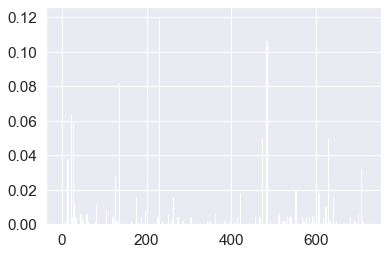

In [202]:
# visualize the frequency vector for image 0
plt.bar(list(range(k)), im_features[0])
plt.show()

## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [ ]:
#im_features.shape

In [100]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)

feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 495)


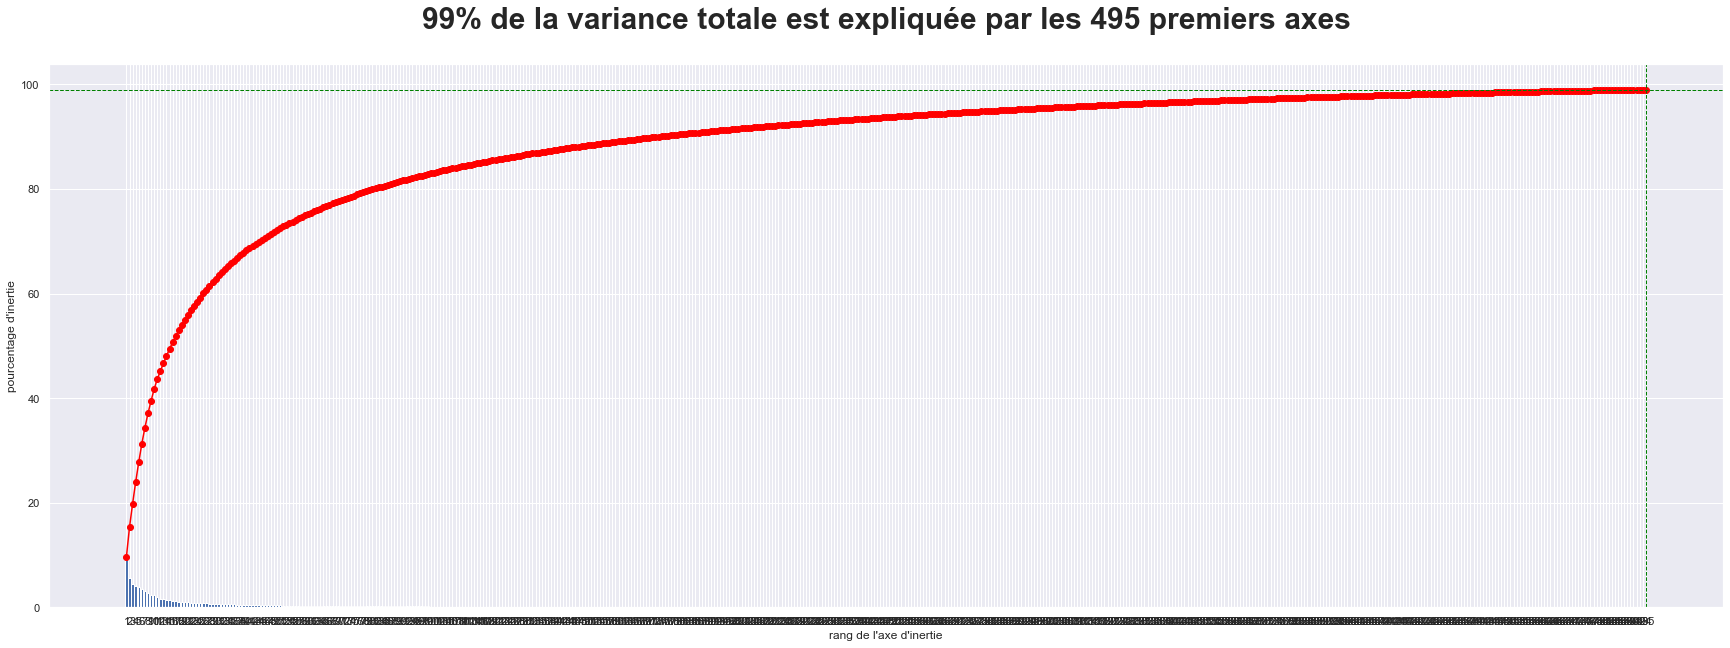

In [101]:
# Explained variance
varexpl = pca.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(30,10))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=99, linestyle="--", 
            color="green",
            linewidth=1)

limit = 99
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée par les {} premiers axes".format(limit, min_plans),
                                                     fontsize = 30, pad = 35, fontweight = 'bold')
plt.show(block=False)

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [103]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["category"]
print(df_tsne.shape)

(1050, 3)


In [104]:
df_tsne.head()

,tsne1,tsne2,class
0,-31.79935,9.95976,Home Furnishing
1,-18.26542,13.14830,Baby Care
2,-19.53215,-0.55019,Baby Care
3,-6.93186,24.08724,Home Furnishing
4,-22.25737,13.74963,Home Furnishing


In [106]:
#feat_pca.shape[1]

## Analyse visuelle : affichage T-SNE selon catégories d'images

In [111]:
nb_categories = df["category"].nunique()
nb_categories

7

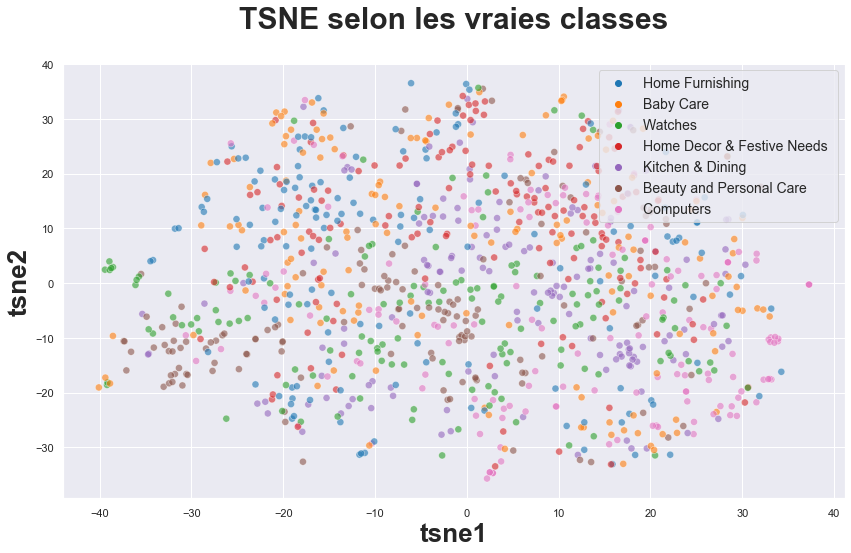

In [133]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=nb_categories), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [117]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=nb_categories, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [118]:
df_tsne["cluster"].nunique()

7

In [120]:
df_tsne.sample(5)

,tsne1,tsne2,class,cluster
135,-4.01756,-1.75702,Kitchen & Dining,0
929,2.38524,21.45312,Home Decor & Festive Needs,2
301,5.05452,-30.59304,Beauty and Personal Care,5
663,-7.74962,-18.59987,Home Furnishing,5
478,-13.77930,-25.40339,Home Furnishing,5


In [123]:
df_tsne["cluster"].value_counts()

4    178
2    156
6    154
0    153
1    150
3    140
5    119
Name: cluster, dtype: int64

###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

In [127]:
sns.color_palette

<function seaborn.palettes.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)>

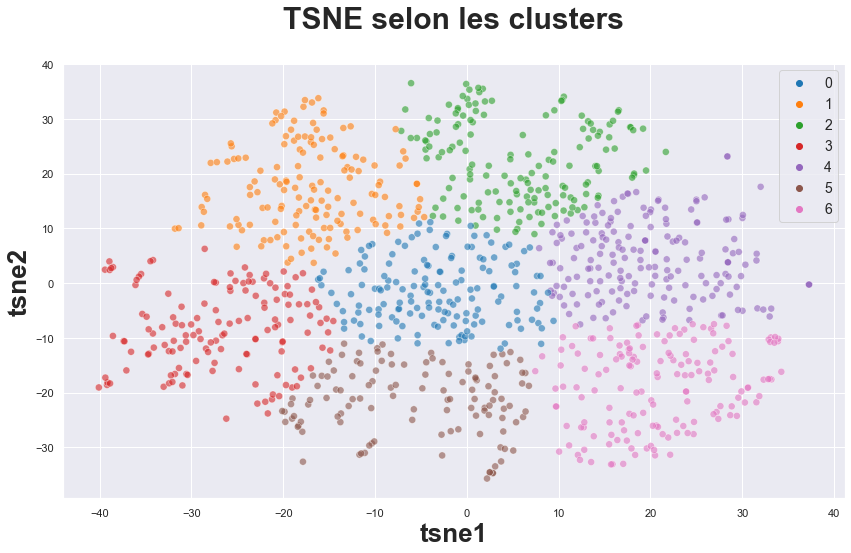

ARI :  0.051094079146851046


In [134]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=nb_categories), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_image["category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

**Le score ARI de 0.051 reste très faible**

In [128]:
#categories
#label
df_image["kmeans_clusters"] = cls.labels_
df_image.head()

,product_name,category,image,category_code,kmeans_clusters
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,4,1
1,Sathiyas Cotton Bath Towel,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,0,1
2,Eurospa Cotton Terry Face Towel Set,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,0,3
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,4,1
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,4,1


Sample Cluster - 1 :


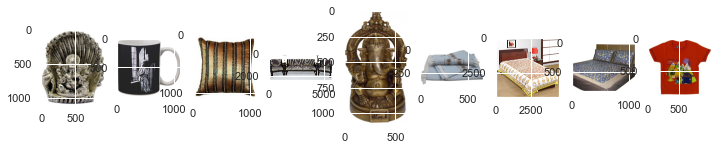

Sample Cluster - 3 :


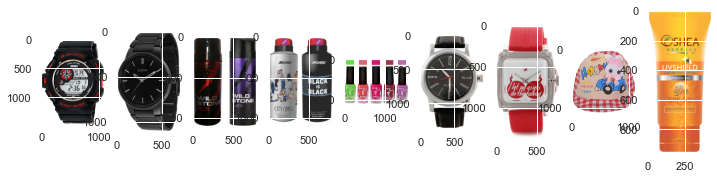

Sample Cluster - 4 :


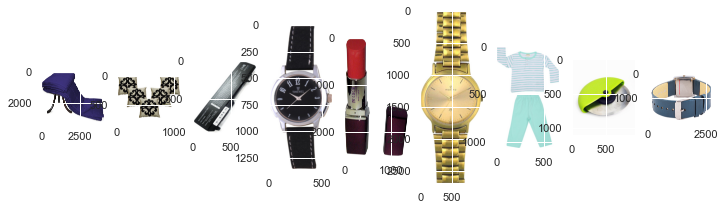

Sample Cluster - 0 :


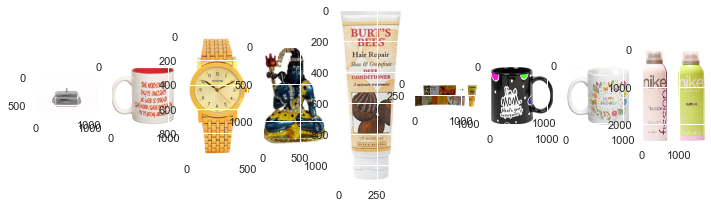

Sample Cluster - 6 :


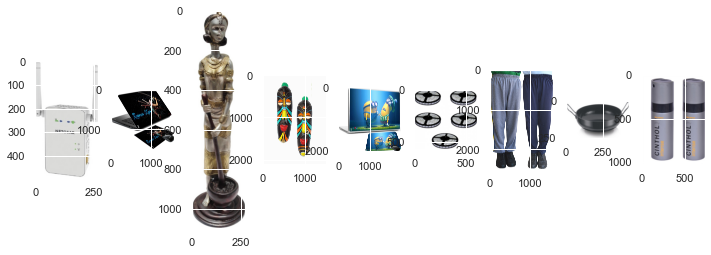

Sample Cluster - 2 :


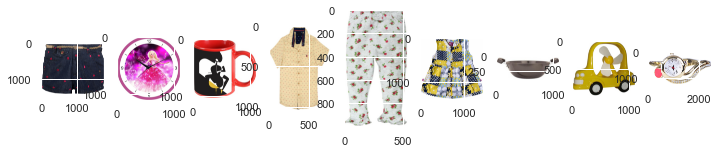

Sample Cluster - 5 :


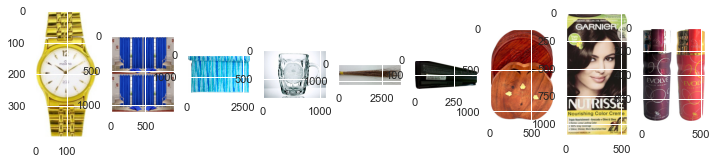

In [131]:
from matplotlib.image import imread

path = "Flipkart/Images/"
list_clusters = df_image["kmeans_clusters"].unique().tolist()

for cluster in list_clusters:
    print('Sample Cluster - {} :'.format(cluster))
    image_sample = df_image[df_image["kmeans_clusters"] == cluster]["image"].sample(9)
    
    plt.figure(figsize=(12,4))
    for i in range(9):
        plt.subplot(190 + 1 + i)
        filename = path + image_sample.iloc[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [186]:
for i in list_clusters:
    print(f"Cluster {i} :")
    df_cls_i = df_image[df_image["kmeans_clusters"] == i]
    cat = df_cls_i['category'].unique()
    print(df_cls_i["category"].value_counts())
    print('Dans le Cluster {} on retrouve les images réparties dans les catégories {} \n'.format(i, len(cat))) 
    print("\n")

Cluster 1 :
Home Furnishing                58
Baby Care                      40
Home Decor & Festive Needs     29
Kitchen & Dining                9
Computers                       7
Watches                         4
Beauty and Personal Care        3
Name: category, dtype: int64
Dans le Cluster 1 on retrouve les images réparties dans les catégories 7 



Cluster 3 :
Beauty and Personal Care       45
Watches                        34
Home Furnishing                16
Home Decor & Festive Needs     14
Baby Care                      12
Computers                      10
Kitchen & Dining                9
Name: category, dtype: int64
Dans le Cluster 3 on retrouve les images réparties dans les catégories 7 



Cluster 4 :
Home Decor & Festive Needs     31
Baby Care                      31
Kitchen & Dining               29
Computers                      29
Watches                        23
Home Furnishing                19
Beauty and Personal Care       16
Name: category, dtype: int64
Dans le C

In [174]:
table = pd.pivot_table(df_image, values='category_code', index=['category'],  # , 'category'
                       columns=['kmeans_clusters'], aggfunc=lambda x: len(x), fill_value=0)
table

kmeans_clusters,0,1,2,3,4,5,6
category,,,,,,,
Baby Care,15,40,25,12,31,7,20
Beauty and Personal Care,42,3,16,45,16,18,10
Computers,14,7,19,10,29,23,48
Home Decor & Festive Needs,11,29,49,14,31,6,10
Home Furnishing,9,58,15,16,19,17,16
Kitchen & Dining,27,9,24,9,29,20,32
Watches,35,4,8,34,23,28,18


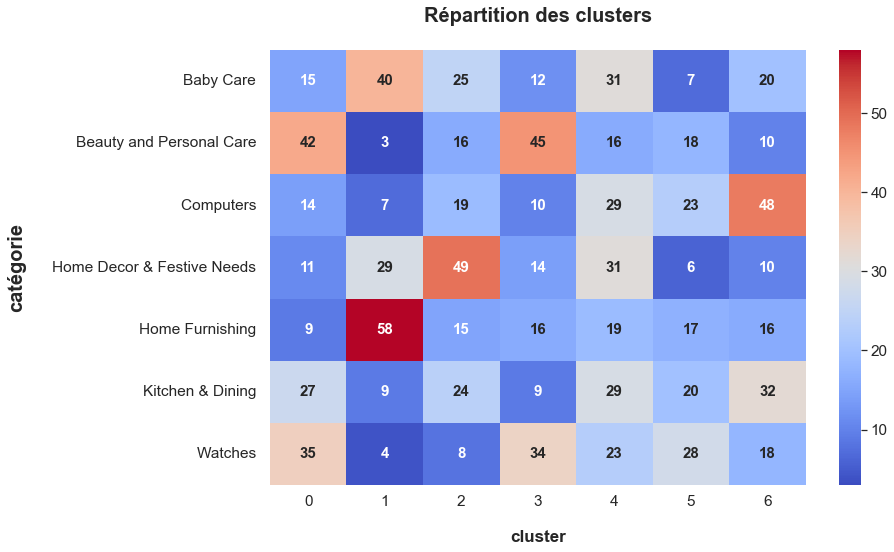

In [185]:
plt.figure(figsize=(12, 8))
plt.title('Répartition des clusters\n', size=20, weight='bold')
sns.set(font_scale=1.4)  # for label size
sns.heatmap(table, annot=True,
            cmap='coolwarm',
            annot_kws={"size": 15, 'weight': 'bold'},
            fmt='g')

plt.ylabel("catégorie\n", weight='bold', size=20)
plt.xlabel('\ncluster', weight='bold', size=17)
plt.show()

### 6.2  TRANSFER LEARNING

Nous allons implémenter un algorithme de type CNN Transfer Learning en utilisant le modèle VGG-16

- VGG-16 est une version du réseau de neurones convolutif VGG-Net.
- VGG-16 est constitué de plusieurs couches, dont 13 couches de convolution et 3 fully-connected. Il doit donc apprendre les poids de 16 couches.
- Il prend en entrée une image en couleurs de taille 224  × 224 px et la classifie dans une des 1000 classes. Il renvoie donc un vecteur de taille 1000, qui contient les probabilités d'appartenance à chacune des classes. 

- le Transfer Learning consiste à utiliser le modèle VGG16 pré-entraîné sur ImageNet (ImageNet est un projet de recherche visant à développer une grande base de données d'images avec des annotations, c'est-à-dire des images et leurs descriptions).

**3 étapes**

>1. ÉTAPE 1 - Chargement des images, extraction des features (Preprocess each image according to the input accepted by the transfer learning model and convert each image to the respective vector by using the weights from the transfer learning model. Then flatten and store all the image weights in a list)

>2. ÉTAPE 2 - Réduction de dimension (Apply TSNE dimension reduction (initialized  with a PCA))

>3. ÉTAPE 3 - Clustering (Apply clustering with k-means)

#### ÉTAPE 1 - Chargement des images, extraction des features

In [567]:
df_image

,product_name,category,image,category_code,kmeans_clusters
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,4,1
1,Sathiyas Cotton Bath Towel,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,0,1
2,Eurospa Cotton Terry Face Towel Set,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,0,3
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,4,1
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,4,1
...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg,0,2
1046,Wallmantra Large Vinyl Sticker Sticker,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg,0,3
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,5912e037d12774bb73a2048f35a00009.jpg,0,2
1048,Wallmantra Medium Vinyl Sticker Sticker,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,0,6


In [585]:
# Dataframe de travail pour le traitement des images


path = "./Flipkart/Images/"

products_image_data = pd.DataFrame()
products_image_data["image"] = df_image["image"]
products_image_data['image_loc'] = [path + row for row in df_image['image']]
products_image_data["category"] = df_image["category"]

products_image_data.head(3)

,image,image_loc,category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,./Flipkart/Images/55b85ea15a1536d46b7190ad6fff...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,./Flipkart/Images/7b72c92c2f6c40268628ec5f14c6...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,./Flipkart/Images/64d5d4a258243731dc7bbb1eef49...,Baby Care


In [576]:
# Utilisation de VGG16 pré-entraîné sur ImageNet avec les images d'origine
# VGG16 imports
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils import img_to_array, array_to_img

# Liste
vgg16_all_features = []

# Instanciation du modèle
model_vgg16 = VGG16(weights='imagenet', include_top=False)
# Résumé de l'architecture du modèle
model_vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [586]:
for rep_image in products_image_data['image_loc']:

    # Charger l'image et la redimensionner à la taille
    # requise de 224×224 pixels.
    img = load_img(rep_image, target_size=(224, 224))
    # Convertir les pixels en un tableau NumPy afin de pouvoir travailler
    # avec dans Keras
    img = img_to_array(img)
    # Redimensionnement
    img = np.expand_dims(img, axis=0)
    # Préparer de nouvelles entrées pour le réseau.
    img = preprocess_input(img)

    # obtenir une prédiction de la probabilité d'appartenance
    # de l'image à chacun des 1000 types d'objets connus.
    vgg16_feature = model_vgg16.predict(img)
    # Ajouter la feature prédite en nparray à la liste
    vgg16_all_features.append(np.array(vgg16_feature).flatten())

vgg16_all_features = np.array(vgg16_all_features)

1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 137ms/step


In [587]:
# Dataframe de sauvegarde des BOVW VGG16
# Association des features à chaque image
products_image_data['vgg16_bovw'] = [vgg16_all_features[i] for i in range(products_image_data.shape[0])]
# Dataframe de travail
df_vgg16_bovw = products_image_data[['image', 'image_loc', 'category', 'vgg16_bovw']]
# Constituer le dataframe de vecteurs de BOVW VGG16
df_vgg16_vectors = pd.DataFrame.from_records(vgg16_all_features)

#### ÉTAPE 2 - Réduction de dimension

La réduction PCA tout en gardant 99% de variance expliquée 

In [588]:
print("Dimensions dataset avant réduction PCA : ", df_vgg16_vectors.shape)
pca = decomposition.PCA(n_components=0.99)
pca_results_vgg16 = pca.fit_transform(df_vgg16_vectors)
print("Dimensions dataset après réduction PCA : ", pca_results_vgg16.shape)

Dimensions dataset avant réduction PCA :  (1050, 25088)
Dimensions dataset après réduction PCA :  (1050, 940)


**TSNE**

Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [589]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
tsne_results_vgg16 = tsne.fit_transform(pca_results_vgg16)

df_tsne_vgg16 = pd.DataFrame(tsne_results_vgg16[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_vgg16["class"] = products_image_data["category"]
print(df_tsne_vgg16.shape)

(1050, 3)


**Visualisation**

Affichage T-SNE selon les catégories d'images

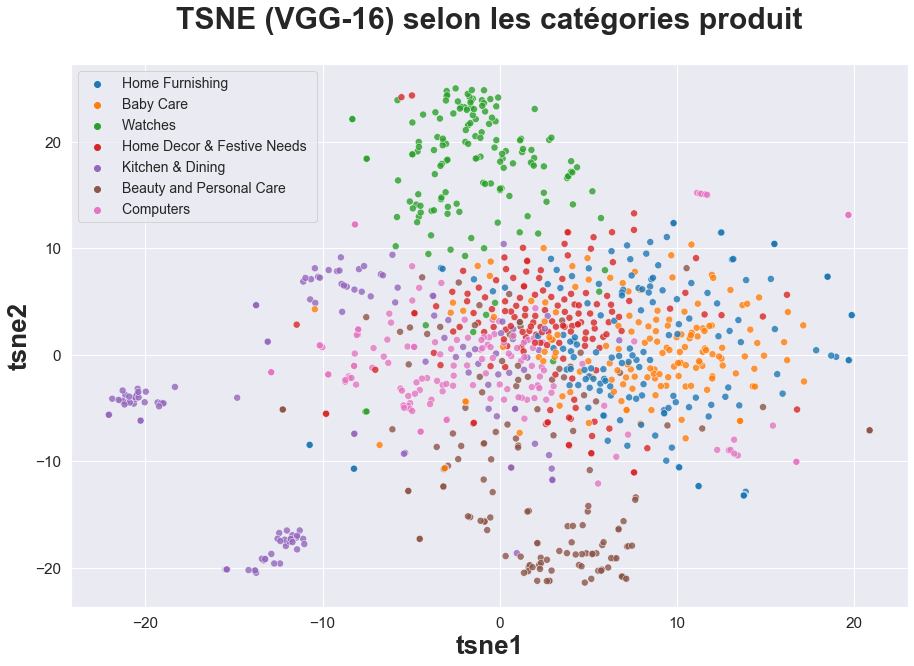

In [590]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne_vgg16, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.8)

plt.title('TSNE (VGG-16) selon les catégories produit', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

####  ÉTAPE 3 - Clustering

In [594]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

#Création de clusters à partir du T-SNE 
X = df_tsne_vgg16[["tsne1","tsne2"]]

cls = KMeans(n_clusters=7, init='k-means++', random_state=0)
cls.fit(X)

df_tsne_vgg16["cluster"] = cls.labels_

sil = silhouette_score(X,cls.labels_,metric="euclidean")
print("Le score de silhouette est", sil)

Le score de silhouette est 0.40029007


In [596]:
# Création des labels à partir du nom de catégory produit
products_image_data["label"] = le.fit_transform(products_image_data["category"])

In [597]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Baby Care ': 0, 'Beauty and Personal Care ': 1, 'Computers ': 2, 'Home Decor & Festive Needs ': 3, 'Home Furnishing ': 4, 'Kitchen & Dining ': 5, 'Watches ': 6}


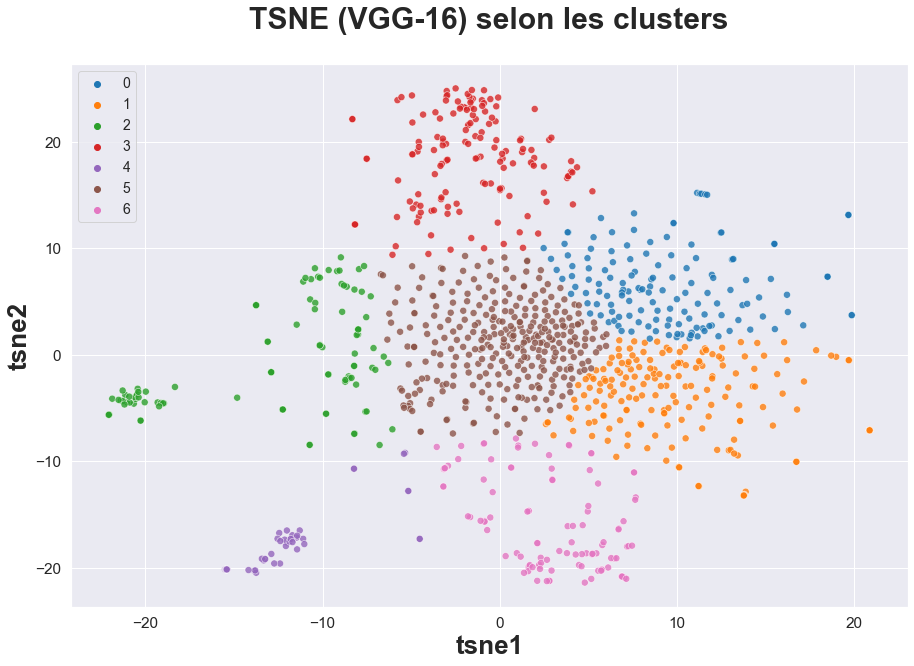

ARI :  0.28712226921273604


In [598]:
#Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
plt.figure(figsize=(15,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.8,
    data=df_tsne_vgg16,
    legend="brief")

plt.title('TSNE (VGG-16) selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = products_image_data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [601]:
products_image_data["cluster_vgg16"] = cls.labels_

In [602]:
products_image_data.head()

,image,image_loc,category,vgg16_bovw,label,cluster_vgg16
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,./Flipkart/Images/55b85ea15a1536d46b7190ad6fff...,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 11.387655, 0.0, 0.0, 0.0,...",4,1
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,./Flipkart/Images/7b72c92c2f6c40268628ec5f14c6...,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,./Flipkart/Images/64d5d4a258243731dc7bbb1eef49...,Baby Care,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
3,d4684dcdc759dd9cdf41504698d737d8.jpg,./Flipkart/Images/d4684dcdc759dd9cdf41504698d7...,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,./Flipkart/Images/6325b6870c54cd47be6ebfbffa62...,Home Furnishing,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0


In [603]:
table_vgg16 = pd.pivot_table(products_image_data, values='label', index=['category'],  # , 'category'
                       columns=['cluster_vgg16'], aggfunc=lambda x: len(x), fill_value=0)
table_vgg16

cluster_vgg16,0,1,2,3,4,5,6
category,,,,,,,
Baby Care,46,72,2,0,0,29,1
Beauty and Personal Care,1,15,5,0,4,33,92
Computers,12,13,27,4,0,93,1
Home Decor & Festive Needs,29,13,4,3,0,95,6
Home Furnishing,57,66,2,0,2,23,0
Kitchen & Dining,0,1,60,2,43,34,10
Watches,3,0,2,139,0,6,0


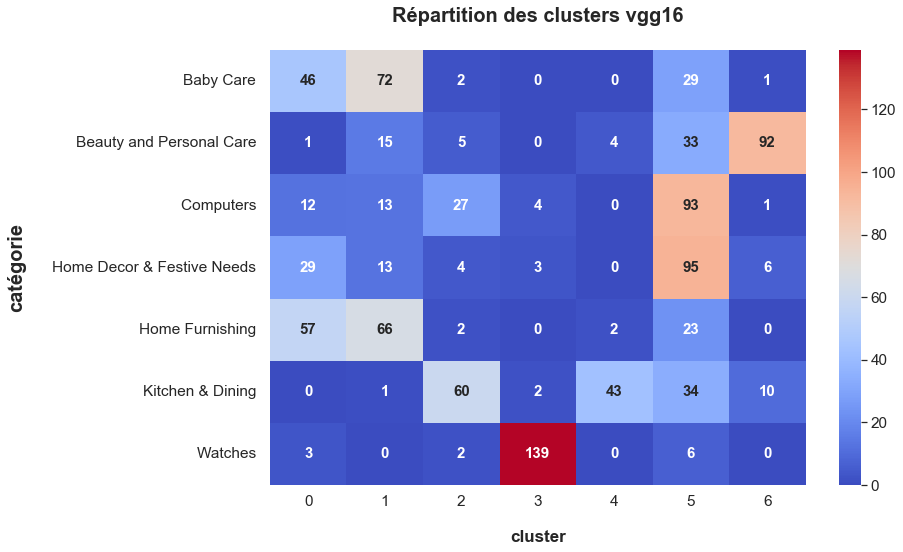

In [604]:
plt.figure(figsize=(12, 8))
plt.title('Répartition des clusters vgg16\n', size=20, weight='bold')
sns.set(font_scale=1.4)  # for label size
sns.heatmap(table_vgg16, annot=True,
            cmap='coolwarm',
            annot_kws={"size": 15, 'weight': 'bold'},
            fmt='g')

plt.ylabel("catégorie\n", weight='bold', size=20)
plt.xlabel('\ncluster', weight='bold', size=17)
plt.show()

In [605]:
for i in list_clusters:
    print(f"Cluster {i} :")
    df_cls_i = products_image_data[products_image_data["cluster_vgg16"] == i]
    cat = df_cls_i['category'].unique()
    print(df_cls_i["category"].value_counts())
    print('Dans le Cluster {} on retrouve les images réparties dans les catégories {} \n'.format(i, len(cat))) 
    print("\n")

Cluster 1 :
Baby Care                      72
Home Furnishing                66
Beauty and Personal Care       15
Home Decor & Festive Needs     13
Computers                      13
Kitchen & Dining                1
Name: category, dtype: int64
Dans le Cluster 1 on retrouve les images réparties dans les catégories 6 



Cluster 3 :
Watches                        139
Computers                        4
Home Decor & Festive Needs       3
Kitchen & Dining                 2
Name: category, dtype: int64
Dans le Cluster 3 on retrouve les images réparties dans les catégories 4 



Cluster 4 :
Kitchen & Dining             43
Beauty and Personal Care      4
Home Furnishing               2
Name: category, dtype: int64
Dans le Cluster 4 on retrouve les images réparties dans les catégories 3 



Cluster 0 :
Home Furnishing                57
Baby Care                      46
Home Decor & Festive Needs     29
Computers                      12
Watches                         3
Beauty and Personal Care

**Observations**

- ARI = 0.28
- Silhouette = 0.38
- 514 erreurs de catégorisation
- On a une meilleure classification des images en utilisation les features obtenus par Tranfer Learning

# Mise en Place de l'Apprentissage 

In [15]:
df_image.head()

,product_name,category,image,category_code
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,4
1,Sathiyas Cotton Bath Towel,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,0
2,Eurospa Cotton Terry Face Towel Set,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,4
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,4


In [14]:
from glob import glob
import os
from PIL import Image

### Creating folders for training and testting set by Categories

In [12]:
def create_folder(path_folder, folder_name):
    
    folder_dir = os.path.join(path_folder, folder_name)
    
    if os.path.exists(folder_dir) == True:
        print("Folder --> "+folder_name+ "...already exists")
        #os.mkdir(cat_folder)
    else:
        os.mkdir(folder_dir)
        print("Folder --> "+folder_name+ "...created")

In [16]:
image_dir = "Flipkart/Images/"
images = glob(f"{image_dir}/*.*")

data_dir = "Flipkart/"
categories = df_image['category'].unique().tolist()

# Create Training and Testing Folder
create_folder(data_dir, "Training Set")
for cat in categories:
    train_dir = data_dir+"Training Set/"
    create_folder(train_dir, cat)
print("Images for Training Set Readay ...\n")
    

create_folder(data_dir, "Testing Set")    
for cat in categories:
    test_dir = data_dir+"Testing Set/"
    create_folder(test_dir, cat)
print("Images for Testing Set Readay ...\n")

Folder --> Training Set...created
Folder --> Home Furnishing ...created
Folder --> Baby Care ...created
Folder --> Watches ...created
Folder --> Home Decor & Festive Needs ...created
Folder --> Kitchen & Dining ...created
Folder --> Beauty and Personal Care ...created
Folder --> Computers ...created
Images for Training Set Readay ...

Folder --> Testing Set...created
Folder --> Home Furnishing ...created
Folder --> Baby Care ...created
Folder --> Watches ...created
Folder --> Home Decor & Festive Needs ...created
Folder --> Kitchen & Dining ...created
Folder --> Beauty and Personal Care ...created
Folder --> Computers ...created
Images for Testing Set Readay ...



### Splitting Data into Train and Test Set

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split en training/testing set.
X_train, X_test, y_train, y_test = train_test_split(df_image['image'],
                                                    df_image['category'],
                                                    test_size=0.20,
                                                    random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)

(840,)
(210,)


### Writing Images in the Good Set by Category

In [19]:
import cv2 

def write_image_in_good_set(L1, L2, set_type):
    """
    Pour l'utilisation de data_generator : répartition des images dans les dossiers 
    train et test correspondants en fonction du test_train split
    """
    c = 0
    
    print("Writing Images in folders ...")
    
    for i, j in zip(L1, L2):

        
        c += 1
        # Lecture de l'image.
        img = cv2.imread('Flipkart/Images/{}'.format(i))
        
        # Ecriture de l'image dans le dossier à la classe correspondante.
        cv2.imwrite('Flipkart/{}/{}/{}'.format(set_type, j, i), img)
        if c%100 == 0 : print("\t", c+1) 
            
    print("Number of Images written :", c)

In [20]:
print(X_train.shape)

(840,)


In [21]:
# Writting the image of the training set.

temps =time.time()

write_image_in_good_set(X_train, y_train, 'Training Set')

duration = time.time() - temps
print("temps de trie des images : ", "%15.2f" % duration, "secondes")

Writing Images in folders ...
	 101
	 201
	 301
	 401
	 501
	 601
	 701
	 801
Number of Images written : 840
temps de trie des images :            41.49 secondes


In [22]:
print(X_test.shape)

(210,)


In [23]:
# Writting the image of the test set.

temps =time.time()

write_image_in_good_set(X_test, y_test, 'Testing Set')

duration = time.time() - temps
print("temps de trie des images : ", "%15.2f" % duration, "secondes")

Writing Images in folders ...
	 101
	 201
Number of Images written : 210
temps de trie des images :            14.09 secondes


## Image Classification using Bag of Visual Words (BOVW)

In [24]:
import cv2 
import numpy as np
import os 


# Get the training classes names and store them in a list
    ## Here we use folder name for class names


train_path = './Flipkart/Training Set'
training_names = os.listdir(train_path)
#training_names

# Get path to all images and save them in a list
    ## Images paths and the corresponding label in image_paths
train_image_paths = []
train_image_classes = []
class_id = 0

# To make it easy to list all file name in a directory let us define a function
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

# Fil the placeholder empty lists with image path, classes and add class ID numper

for training_name in training_names:
    dir = os.path.join(train_path, training_name)
    class_path = imglist(dir)
    train_image_paths+=class_path
    train_image_classes+=[class_id]*len(class_path)
    class_id +=1

In [25]:
train_image_paths
#training_image_classes
#class_id
#categories

['./Flipkart/Training Set/Beauty and Personal Care /42a8fef62716772c391fbdd148cc9c16.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /f2fa99bfaa4aa65a2bd53337e140f949.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /a618354ba17cff64826558d81afc77ab.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /1d829e0eac91d7e85cdd6d581c363360.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /5c7b493625b5fc6689cae49d25e1ae17.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /ab3f4b2d2ec007b7e0eaec213bfdbffc.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /e47b9f88b773b3fd97ab3b51642ff6fb.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /4b0e6f200426b1db8824b2ca0c59ecfa.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /b6c339777814451815fe7950fd4c8536.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /1be8161a259813bca5d068d5730464e7.jpg',
 './Flipkart/Training Set/Beauty and Personal Care /edb97bd2433fd9de301c8a44344777bb.jpg',

In [441]:
len(train_image_paths)

840

In [445]:
# Create feature extraction and keypoint detector objects 
    # Sift is nont available anymore in openCV
# Create list where all descriptros will be stored 
train_des_list = []

# BRISK is a good replacement to SIFT. ORB also works but didn't work well for this 
#brisk = cv2.BRISK_create(30)
sift = cv.SIFT_create(500)
#all_training_images = image_paths + X_train


for image_num in range(len(train_image_paths)):
    if image_num%100 == 0 : print(image_num)
    image = cv.imread(train_image_paths[image_num],0) # convert in gray
    res = cv.equalizeHist(image)   # equalize image histogram 
    kpt, des = sift.detectAndCompute(res, None)
    train_des_list.append(des)
    
train_des_list_by_img = np.asarray(train_des_list)
train_des_list_all    = np.concatenate(train_des_list_by_img, axis=0)

print()
print("Nombre de descripteurs : ", train_des_list_all.shape)

duration = time.time() - temps
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration, "secondes")

0
100
200
300
400
500
600
700
800

Nombre de descripteurs :  (414201, 128)
temps de traitement BRISK descriptor :           398.17 secondes


In [446]:
from sklearn import cluster, metrics

# Determination number of clusters
temps = time.time()

# Racine carré du nombres de descripteurs - pour avoir les feature (visual words)
k = int(round(np.sqrt(len(train_des_list_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(train_des_list_all)

duration = time.time() - temps2
print("temps de traitement kmeans : ", "%15.2f" % duration, "secondes")

Nombre de clusters estimés :  644
Création de 644 clusters de descripteurs ...
temps de traitement kmeans :         20434.40 secondes


In [447]:
train_des_list_all.shape

(414201, 128)

In [449]:
train_descriptors = train_des_list_by_img
train_descriptors.shape

(840,)

In [450]:
train_descriptors[0]

array([[ 14.,  13.,  10., ...,  50.,  79.,  22.],
       [  0.,   0.,   0., ...,  48.,  23.,  11.],
       [  0.,   0.,   0., ...,   0.,   0.,   8.],
       ...,
       [ 17.,  21.,  32., ...,   0.,   0.,   2.],
       [  6.,   0.,   0., ...,  12.,   0.,   0.],
       [106.,  26.,  13., ...,   1.,   0.,   0.]], dtype=float32)

In [452]:
#kmeans.predict(train_descriptors[0])

### Creation des features images

#### Méthode 1

In [453]:
import imutils

k = 644

feature_vectors = []
train_path = './Flipkart/Training Set'

for cat in categories:
    path = train_path+"/{}/".format(cat)
    
    list_name_pictures_train = [file for file in listdir(path)]
    print(cat)
    print("Nombre d'images pour cette classe : {} \n \n " .format(len(list_name_pictures_train)))
    
    for image_num in range(len(list_name_pictures_train)):
        extension = list_name_pictures_train[image_num].split('.')[-1]
        if extension != "jpg":
            pass
        else:
            image_bw = cv2.imread(path+list_name_pictures_train[image_num], 0)  # convert in grey
            image_bw_resized = imutils.resize(image_bw, width=400)
            image_cont = cv2.equalizeHist(image_bw_resized)
            #image_denoise = cv2.fastNlMeansDenoising(image_cont)
            #image_filtre_1 = cv2.medianBlur(image_denoise, 3)
        
        
             # classification of all descriptors in the model
            predict_kmeans = kmeans.predict(des_list_by_img[image_num])
            
            # calculates the histogram
            # k =int(round(np.sqrt(len(sift_keypoints_all)),0))
            hist, bin_edges = np.histogram(predict_kmeans, bins=k)
            
            # histogram is the feature vector
            feature_vectors.append(hist)
            
    im_features_1 = np.asarray(feature_vectors)

Home Furnishing 
Nombre d'images pour cette classe : 115 
 
 
Baby Care 
Nombre d'images pour cette classe : 123 
 
 
Watches 
Nombre d'images pour cette classe : 117 
 
 
Home Decor & Festive Needs 
Nombre d'images pour cette classe : 120 
 
 
Kitchen & Dining 
Nombre d'images pour cette classe : 124 
 
 
Beauty and Personal Care 
Nombre d'images pour cette classe : 129 
 
 
Computers 
Nombre d'images pour cette classe : 112 
 
 


In [383]:
#im_features_1

#### Méthode 2

In [464]:
# Creation of histograms (features)

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms

temps  =time.time()
hist_vectors=[]

for i, image_desc in enumerate(train_descriptors) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

train_features = np.asarray(hist_vectors)

duration = time.time() - temps
print("temps de création histogrammes : ", "%15.2f" % duration, "secondes")

0
100
200
300
400
500
600
700
800
temps de création histogrammes :             7.07 secondes


In [493]:
#im_features_2
train_features.shape

(840, 644)

In [508]:
#im_features 
train_features

visual_word_Xtrain = pd.DataFrame(train_features)
visual_word_Xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643
0,0.00399,0.000,0.01996,0.000,0.00399,0.00000,0.002,0.00000,0.000,0.002,0.000,0.000,0.002,0.00000,0.000,0.002,0.000,0.00000,0.00000,0.00200,0.002,0.000,0.000,0.00200,0.00000,0.002,0.000,0.000,0.000,0.00000,0.002,0.00000,0.00599,0.000,0.000,0.000,0.000,0.00599,0.000,0.000,0.000,0.00000,0.00399,0.00000,0.002,0.000,0.00000,0.002,0.000,0.000,0.002,0.00399,0.01198,0.000,0.002,0.00200,0.000,0.00200,0.002,0.00200,0.000,0.00399,0.00000,0.002,0.00000,0.000,0.00399,0.002,0.00000,0.00200,0.00399,0.00399,0.00000,0.00000,0.00599,0.00200,0.0,0.000,0.002,0.00000,0.00000,0.00200,0.002,0.000,0.000,0.00000,0.00200,0.002,0.002,0.00000,0.00200,0.00200,0.00798,0.00000,0.00200,0.00000,0.00200,0.000,0.002,0.000,...,0.000,0.00000,0.00000,0.000,0.000,0.00000,0.00200,0.000,0.00798,0.00200,0.002,0.00000,0.002,0.00000,0.002,0.00798,0.00000,0.000,0.00399,0.000,0.00399,0.00000,0.000,0.000,0.00000,0.000,0.002,0.000,0.00200,0.002,0.00399,0.002,0.0,0.00000,0.002,0.00599,0.002,0.00399,0.00200,0.00599,0.000,0.000,0.000,0.002,0.00599,0.00000,0.00000,0.000,0.002,0.000,0.000,0.002,0.00000,0.00000,0.000,0.000,0.000,0.002,0.000,0.000,0.00000,0.000,0.00599,0.00200,0.000,0.000,0.002,0.00399,0.002,0.000,0.00000,0.00599,0.00000,0.00000,0.00399,0.000,0.002,0.00399,0.00000,0.000,0.002,0.00000,0.00200,0.000,0.000,0.002,0.000,0.00200,0.00200,0.00399,0.00000,0.00000,0.00200,0.002,0.00000,0.002,0.000,0.000,0.002,0.000
1,0.00200,0.002,0.00000,0.000,0.00200,0.00000,0.000,0.00000,0.000,0.000,0.002,0.000,0.000,0.00400,0.010,0.000,0.000,0.00000,0.00400,0.00800,0.000,0.004,0.000,0.00400,0.00000,0.000,0.006,0.000,0.004,0.00000,0.006,0.00000,0.00000,0.000,0.004,0.000,0.004,0.00000,0.004,0.000,0.000,0.00400,0.00400,0.00200,0.004,0.002,0.00000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000,0.000,0.00200,0.000,0.00000,0.004,0.00000,0.000,0.00000,0.00400,0.012,0.00200,0.006,0.00800,0.000,0.00400,0.01000,0.00000,0.00200,0.00000,0.00000,0.00000,0.00000,0.0,0.006,0.000,0.00000,0.00000,0.00000,0.000,0.000,0.000,0.00000,0.00200,0.004,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00800,0.00200,0.00000,0.000,0.000,0.000,...,0.002,0.00000,0.00000,0.000,0.002,0.00200,0.00000,0.000,0.00200,0.00200,0.000,0.00000,0.000,0.00000,0.000,0.00000,0.00000,0.002,0.00000,0.006,0.00000,0.00000,0.000,0.002,0.00000,0.000,0.000,0.006,0.00000,0.002,0.00000,0.000,0.0,0.00000,0.000,0.00000,0.000,0.00000,0.00000,0.00000,0.000,0.000,0.012,0.000,0.00000,0.00600,0.00000,0.002,0.010,0.000,0.000,0.000,0.00000,0.00400,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.000,0.00000,0.00200,0.000,0.004,0.000,0.00000,0.006,0.000,0.00000,0.00000,0.00000,0.00000,0.00400,0.006,0.000,0.00200,0.00000,0.000,0.000,0.00000,0.00000,0.002,0.000,0.008,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000
2,0.00000,0.000,0.00000,0.000,0.00000,0.00000,0.000,0.00000,0.000,0.012,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.00000,0.00200,0.00200,0.000,0.000,0.006,0.00400,0.00000,0.000,0.000,0.000,0.002,0.00200,0.004,0.00000,0.00000,0.008,0.000,0.002,0.000,0.00000,0.000,0.002,0.000,0.00000,0.00000,0.00000,0.000,0.000,0.00400,0.002,0.000,0.000,0.000,0.00000,0.00200,0.000,0.000,0.00000,0.000,0.00000,0.002,0.00000,0.000,0.00200,0.00000,0.000,0.00400,0.024,0.00200,0.000,0.00000,0.00000,0.00200,0.00000,0.00000,0.00200,0.00000

In [ ]:
pca = PCA(n_components=df_visual_word_Xtrain.shape[1], random_state=40)
pca.fit_transform(df_visual_word_Xtrain)

In [503]:
from sklearn import manifold, decomposition

print("Dimensions Train dataset avant réduction PCA : ", train_features.shape)
pca = decomposition.PCA(n_components=train_features.shape[1])

feat_pca= pca.fit_transform(train_features)
print("Dimensions Train dataset après réduction PCA : ", feat_pca.shape)

Dimensions Train dataset avant réduction PCA :  (840, 644)
Dimensions Train dataset après réduction PCA :  (840, 644)


In [504]:
X_pca_train = pca.transform(visual_word_Xtrain)[:, :840]
X_pca_train.shape

(840, 644)

In [457]:
# Perform Tf-Idf vectorization

nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [512]:
# Scaling the words
#Standardize features by removing the mean and scaling to unit variance
#In a way normalization
from sklearn.preprocessing import StandardScaler
stdSlr = StandardScaler().fit(train_features)
im_features_scaled = stdSlr.transform(train_features)

In [381]:
#Train an algorithm to discriminate vectors corresponding to positive and negative training images
# Train the Linear SVM
temps  =time.time()

from sklearn.svm import LinearSVC
svc_clf = LinearSVC(max_iter=10000)  #Default of 100 is not converging
svc_clf.fit(im_features_scaled, np.array(image_classes))

duration = time.time() - temps
print("Temps de création du model : ", "%15.2f" % duration, "secondes")

Temps de création du model :            89.00 secondes


### Random Forest Model

In [515]:
#train_image_classes

In [516]:
#Train Random forest to compare how it does against SVM
temps  =time.time()

from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier(n_estimators = 100, random_state=30)
rdf_clf.fit(train_features, np.array(train_image_classes))

duration = time.time() - temps
print("Temps de création du model : ", "%15.2f" % duration, "secondes")

Temps de création du model :             0.88 secondes


In [517]:
from sklearn.model_selection import train_test_split, GridSearchCV

# GridSearch
param_grid = [{'max_depth': range(2, 10, 2)}]
gridSearch = GridSearchCV(RandomForestClassifier(),
                          param_grid, cv=5, scoring='accuracy')

score = 'accuracy'


# Fit sur le training set.
gridSearch.fit(X_pca_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
best_param = gridSearch.best_estimator_
print("Best paramètres: {}".format(best_param))

# Afficher les performances correspondantes
print("--> Résultats de la validation croisée :")

for mean, std, params in zip(gridSearch.cv_results_['mean_test_score'],  # score moyen
                             gridSearch.cv_results_['std_test_score'],  # écart-type du score
                             gridSearch.cv_results_['params']           # valeur de l'hyperparamètre
                             ):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score, mean, std*2, params))

Best paramètres: RandomForestClassifier(max_depth=4)
--> Résultats de la validation croisée :
accuracy = 0.139 (+/-0.047) for {'max_depth': 2}
accuracy = 0.143 (+/-0.058) for {'max_depth': 4}
accuracy = 0.121 (+/-0.022) for {'max_depth': 6}
accuracy = 0.132 (+/-0.044) for {'max_depth': 8}


In [519]:
#Train Random forest to compare how it does against SVM
temps  =time.time()

from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier(n_estimators = 100, 
                                 max_depth = 4,
                                  random_state=30)

rdf_clf.fit(im_features, np.array(train_image_classes))

duration = time.time() - temps
print("Temps de création du model : ", "%15.2f" % duration, "secondes")

Temps de création du model :             0.25 secondes


## Validating Bag of Visual Words (BOVW)

In [459]:
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score #sreeni
#from sklearn.externals import joblib



test_path = './Flipkart/Testing Set'
testing_names = os.listdir(train_path)
#testing_names

# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
test_image_paths = []
testing_image_classes = []
class_id = 0


#To make it easy to list all file names in a directory let us define a function

def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

#Fill the placeholder empty lists with image path, classes, and add class ID number

for testing_name in testing_names:
    dir = os.path.join(test_path, testing_name)
    class_path = imglist(dir)
    test_image_paths+=class_path
    testing_image_classes+=[class_id]*len(class_path)
    class_id+=1

In [460]:
len(test_image_paths)
#image_classes
#class_id 

210

In [461]:

# Create list where all descriptros will be stored 
test_des_list = []

# BRISK is a good replacement to SIFT. ORB also works but didn't work well for this 
#brisk = cv2.BRISK_create(30)
sift = cv.SIFT_create(500)

for image_num in range(len(test_image_paths)):
    if image_num%100 == 0 : print(image_num)
    image = cv.imread(test_image_paths[image_num],0) # convert in gray
    res = cv.equalizeHist(image)   # equalize image histogram 
    kpt, des = sift.detectAndCompute(res, None)
    test_des_list.append(des)
    
test_des_list_by_img = np.asarray(test_des_list)
test_des_list_all    = np.concatenate(test_des_list_by_img, axis=0)

print()
print("Nombre de descripteurs : ", test_des_list_all.shape)

duration = time.time() - temps
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration, "secondes")

0
100
200

Nombre de descripteurs :  (103367, 128)
temps de traitement BRISK descriptor :           568.05 secondes


In [466]:
test_descriptors = test_des_list_by_img

In [467]:
# Creation of a matrix of histograms

temps  =time.time()
hist_vectors=[]

for i, image_desc in enumerate(test_descriptors) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

test_features = np.asarray(hist_vectors)

duration = time.time() - temps
print("temps de création histogrammes : ", "%15.2f" % duration, "secondes")

0
100
200
temps de création histogrammes :             1.61 secondes


In [527]:
#test_features


visual_word_Xtest = pd.DataFrame(test_features)
visual_word_Xtest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643
0,0.002,0.00200,0.00000,0.000,0.00000,0.000,0.00000,0.00000,0.000,0.000,0.00000,0.000,0.000,0.004,0.010,0.000,0.000,0.00000,0.00000,0.00200,0.00000,0.000,0.00400,0.002,0.000,0.000,0.002,0.000,0.000,0.00200,0.000,0.000,0.00000,0.00000,0.000,0.00200,0.01400,0.00000,0.00000,0.00000,0.00200,0.00200,0.00000,0.01200,0.00000,0.002,0.00000,0.002,0.004,0.00200,0.002,0.000,0.0,0.00000,0.00200,0.00200,0.000,0.014,0.014,0.002,0.00000,0.000,0.000,0.010,0.00200,0.000,0.000,0.000,0.000,0.004,0.002,0.00000,0.004,0.000,0.00000,0.00400,0.00200,0.000,0.00000,0.00000,0.000,0.01200,0.00200,0.000,0.000,0.00000,0.00000,0.00000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.006,0.000,0.000,...,0.000,0.004,0.00000,0.00000,0.00000,0.00400,0.00400,0.00000,0.00000,0.00400,0.00000,0.000,0.000,0.002,0.01000,0.00000,0.000,0.00600,0.000,0.00000,0.000,0.00200,0.002,0.00000,0.000,0.0,0.00,0.012,0.00000,0.000,0.000,0.00000,0.00000,0.00,0.000,0.00000,0.000,0.00000,0.00400,0.000,0.000,0.000,0.004,0.00000,0.00000,0.00000,0.00600,0.00000,0.00000,0.00000,0.000,0.000,0.00000,0.00000,0.000,0.000,0.00000,0.00000,0.00200,0.00000,0.002,0.000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.010,0.000,0.00000,0.002,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.01200,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.00200,0.000,0.000,0.0,0.00000,0.002,0.00000,0.0,0.00000,0.000,0.00000,0.000,0.000
1,0.000,0.00000,0.00258,0.000,0.00258,0.000,0.00258,0.00258,0.000,0.000,0.00000,0.000,0.000,0.000,0.000,0.000,0.000,0.00773,0.00258,0.00773,0.00000,0.000,0.00515,0.000,0.000,0.000,0.000,0.000,0.000,0.00258,0.000,0.000,0.00258,0.00000,0.000,0.00000,0.00000,0.00515,0.00515,0.00258,0.00515,0.00258,0.00258,0.00773,0.01289,0.000,0.01031,0.000,0.000,0.00258,0.000,0.000,0.0,0.00258,0.00258,0.00515,0.000,0.000,0.000,0.000,0.00258,0.000,0.000,0.000,0.00258,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.00000,0.00258,0.00258,0.000,0.00258,0.00258,0.000,0.00258,0.00258,0.000,0.000,0.00258,0.00000,0.00258,0.000,0.000,0.000,0.00515,0.00000,0.00515,0.000,0.00258,0.00258,0.000,0.000,0.000,...,0.000,0.000,0.00258,0.00000,0.01289,0.00000,0.00258,0.00000,0.00258,0.00515,0.00000,0.000,0.000,0.000,0.00258,0.00515,0.000,0.00258,0.000,0.00258,0.000,0.00258,0.000,0.00258,0.000,0.0,0.00,0.000,0.00515,0.000,0.000,0.00000,0.00258,0.00,0.000,0.00258,0.000,0.00258,0.00258,0.000,0.000,0.000,0.000,0.00258,0.00000,0.01546,0.00000,0.00515,0.00258,0.01031,0.000,0.000,0.00258,0.00000,0.000,0.000,0.00000,0.00258,0.00258,0.00258,0.000,0.000,0.00258,0.000,0.00000,0.00773,0.00000,0.00258,0.000,0.000,0.01546,0.000,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.00773,0.000,0.000,0.000,0.00258,0.000,0.000,0.000,0.00258,0.000,0.000,0.0,0.01289,0.000,0.00258,0.0,0.00258,0.000,0.00258,0.000,0.000
2,0.000,0.01996,0.00000,0.000,0.00000,0.000,0.00000,0.00000,0.000,0.000,0.00200,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00200,0.00000,0.000,0.00998,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.00000,0.00000,0.000,0.00399,0.00399,0.00000,0.01796,0.00000,0.00000,0.00200,0.00000,0.00000,0.00599,0.000,0.00000,0.002,0.000,0.00000,0.002,0.000,0.0,0.00000,0.00000,0.00000,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.00200,0.000,0.000,0.000,0.002,0.000,0.000,0.02994,0.000,0.000,0.00998,0.00000,0.00000,0

In [469]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf_test = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

In [528]:
# Scale the features
#Standardize features by removing the mean and scaling to unit variance
#Scaler (stdSlr comes from the pickled file we imported) -from the training set
#stdSlr = StandardScaler().fit(test_features)
test_features_scaled = stdSlr.transform(test_features)

In [471]:
classes_names = training_names = testing_names
classes_names

['Beauty and Personal Care ',
 'Kitchen & Dining ',
 'Computers ',
 'Home Decor & Festive Needs ',
 'Baby Care ',
 'Watches ',
 'Home Furnishing ']

In [529]:
#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in testing_image_classes]
print(len(true_class))

# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in rdf_clf.predict(test_features_scaled)]
print(len(predictions))

210
210


In [530]:
#Print the true class and Predictions 
print ("true_class ="  + str(true_class[1]))
print ("prediction ="  + str(predictions[1]))


true_class =Beauty and Personal Care 
prediction =Watches 


In [531]:
#To make it easy to understand the accuracy let us print the confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score #sreeni

def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()

accuracy =  0.319047619047619
[[ 1  6  5  2  9  1  3]
 [ 0 17  1  1  1  0  1]
 [ 1  6 17  4  4  5  1]
 [ 0  7  3  7  6  5  2]
 [ 3 12  4  4  8  2  2]
 [ 1  8  5  1  0  9  2]
 [ 1 12  5  0  1  6  8]]


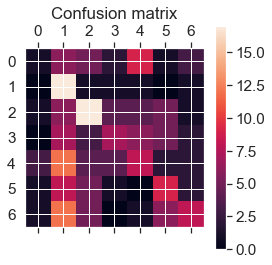

In [532]:
accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)

# <font color='green'>Deep learning : CNN Transfer Learning</font>

deep learning : type d'apprentissage automatique basé sur des réseaux neuronaux artificiels dans lesquels plusieurs couches de traitement sont utilisées pour extraire des données des caractéristiques.

Le transfert learning utilise des modèles pré-entraînés comme point de départ, il permet de développer rapidement des modèles performants et résoudre efficacement des problèmes complexes en Computer Vision ou Natural Language Processing, NLP.

Le Transfer Learning repose sur une idée simple, celle de ré-exploiter les connaissances acquises dans d’autres configurations (sources) pour la résolution d’un problème particulier (cible).

CNN (réseau de neurones par convolution) est un empilement de couches de neurones qui utilise un modèles pré-entraîné comme extracteurs de features. Ces couches apprennent différentes caractéristiques en fonction du niveau où elles se situent. Plus la couche se situe en profondeur, plus elle permet d’extraire des features spécifiques.


Ici, transfer learning via le réseau VGG16 pré-entrainé sur une base d'images riches (imagenet). Le VGG-16 (Very Deep Convolutional Networks for Large-Scale Image Recognition, 16 couches) est l'un des modèles pré-entraînés les plus populaires pour la classification des images.

## <font color='blue'>Mise en place du modèle</font>

In [1]:
# import packages
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

import pickle

2022-11-10 19:08:27.766771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
new_model = Sequential()

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected (couches hautes).
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

#On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :
for layer in model.layers:
    layer.trainable = False

new_model.add(model)

# Ajout d'une couche Flatten pour réduire les dimensions de l'input.
new_model.add(Flatten())

# Ajout de la couche Dense de prédiciton adaptée à notre problème de classifications (7 classes).
new_model.add(Dense(7, activation='softmax'))

2022-11-10 19:08:58.632117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# réseau de neurones
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 7)                 175623    
                                                                 
Total params: 14,890,311
Trainable params: 175,623
Non-trainable params: 14,714,688
_________________________________________________________________


En résumé, le `VGG-16` contient 16 couches où le nombre de caractéristiques est de 25 088 (flatten) après l'aplatissement de la dernière couche convolutive (la 1ère mise en évidence) et dans la couche finale (prédiction ou couche dense finale), le nombre de nœuds est de 7 car le VGG-16 est principalement entraîné pour un problème de classification de 7 classes (la 2ème mise en évidence) (prédiction).

In [4]:
# Compilation du modèle
new_model.compile(loss="categorical_crossentropy",
                  optimizer=optimizers.Adam(lr=0.001), 
                  metrics=["accuracy"])

batch_size = 32

/Users/awf/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## <font color='blue'>Mise en place des données</font>

In [6]:
import numpy as np


folder = './Flipkart/Testing Set'

i = 0

# Liste contenant les catégories des images chargées
y_test_category = []

for j in os.listdir(folder):

    folder_courant = folder + '/' + j

    for filename in os.listdir(folder_courant):

        y_test_category.append(j)

        # Path du fichier.
        path = folder_courant + '/' + filename

        # Charger l'image à la bonne dimension.
        img_resize = load_img(path, target_size=(224, 224))

        # Transformation de l'image en tableau numpy.
        img = img_to_array(img_resize)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

        # Preprocessing.
        img = preprocess_input(img)

        # Ajout de l'image à la liste de stockage.
        if (i == 0):
            x1 = img
            i = 1
        else:
            x1 = np.concatenate((x1, img), axis=0)

/Users/awf/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [7]:
# Training Augmentation configuration
#base_dir = '/Users/amandinelecerfdefer/Desktop/Formation_Data_Scientist_OC/WORK-projet6/Data/'
base_dir = './Flipkart/'

train_dir = os.path.join(base_dir, 'Training Set')
test_dir = os.path.join(base_dir, 'Testing Set')


train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   preprocessing_function=preprocess_input)

# Testing Augmentation
test_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                  preprocessing_function=preprocess_input)

# Generates batches of Augmented Image data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Generator for validation data
validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(224, 224),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 840 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


## <font color='blue'>Exécution</font>

In [8]:
# Fit the model on Training data
history = new_model.fit_generator(train_generator,
                                  epochs=5,
                                  validation_data=validation_generator,
                                  verbose=1)

# Entraînement du modèle via le train_generator.
# On fait attention à l'overfitting en utilisant notre validation set.
# fit_generator fait la même chose que fit mais fit_generator est mieux adapté au nombreuse données

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_8864/1918865641.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(train_generator,


Epoch 1/5
27/27 [==============================] - 188s 7s/step - loss: 1.4820 - accuracy: 0.5560 - val_loss: 0.7074 - val_accuracy: 0.7667
Epoch 2/5
27/27 [==============================] - 188s 7s/step - loss: 0.4192 - accuracy: 0.8690 - val_loss: 0.6315 - val_accuracy: 0.8238
Epoch 3/5
27/27 [==============================] - 172s 6s/step - loss: 0.2119 - accuracy: 0.9369 - val_loss: 0.6956 - val_accuracy: 0.7857
Epoch 4/5
27/27 [==============================] - 178s 7s/step - loss: 0.1413 - accuracy: 0.9643 - val_loss: 0.7769 - val_accuracy: 0.7619
Epoch 5/5
27/27 [==============================] - 171s 6s/step - loss: 0.0969 - accuracy: 0.9798 - val_loss: 0.5544 - val_accuracy: 0.8048


In [9]:
with open('./Flipkart/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
new_model.save("./Flipkart/CNN_pictures_model")

INFO:tensorflow:Assets written to: ./Flipkart/CNN_pictures_model/assets


INFO:tensorflow:Assets written to: ./Flipkart/CNN_pictures_model/assets


une **epoch** : une passe avant et une passe arrière de tous les exemples d'entraînement

**batch size** :  nombre d'échantillons qui seront propagés dans le réseau. 1050 échantillons d'entraînement et vous souhaitez définir une taille de lot égale à 100. 

- L'algorithme prend les 100 premiers échantillons (du 1er au 100e) de l'ensemble de données d'apprentissage et entraîne le réseau. 

- Ensuite, il prend les 100 autres échantillons (du 101e au 200e) et entraîne à nouveau le réseau.

**steps_per_epochs** : nombre d'itérations de lot avant qu'une époque d'apprentissage soit considérée comme terminée : 

steps_per_epoch = len ( X_train ) // batch_size

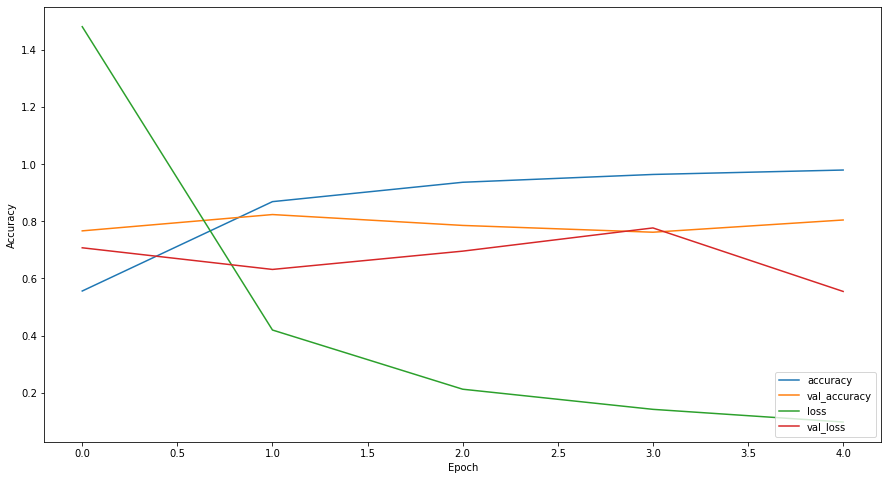

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

- `fit()` sert à entraîner le modèle avec les entrées données (et les étiquettes d'entraînement correspondantes).

- `evaluate()` permet d'évaluer le modèle déjà formé en utilisant les données de validation (ou de test) et les étiquettes correspondantes. Elle renvoie la valeur de perte et les valeurs métriques du modèle.

- `predict()` sert à la prédiction proprement dite. Elle génère des prédictions de sortie pour les échantillons d'entrée.

In [13]:
# Évaluation de la performance du modèle sur des données de test
loss, accuracy = new_model.evaluate(validation_generator)

print("\nModel's Evaluation Metrics: ")
print("---------------------------")
print("Accuracy: {} \nLoss: {}".format(accuracy, loss))

1/7 [===>..........................] - ETA: 30s - loss: 0.6007 - accuracy: 0.8125

/Users/awf/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


7/7 [==============================] - 37s 5s/step - loss: 0.5207 - accuracy: 0.8190

Model's Evaluation Metrics: 
---------------------------
Accuracy: 0.8190476298332214 
Loss: 0.5207018852233887


Le CNN a atteint une précision de prédiction d'envrion de 81%

## <font color='blue'>Prédiction</font>

In [14]:
# Prediction sur le testing Set.
pred = new_model.predict(x1, verbose=1)
pred

7/7 [==============================] - 31s 4s/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.2422270e-11,
        0.0000000e+00, 1.3587865e-13],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.7837450e-09, 0.0000000e+00, 0.0000000e+00, ..., 9.9999118e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in pred]
y_classes[:5]

[1, 1, 1, 1, 1]

In [17]:
import pandas as pd

df = pd.DataFrame(y_classes, columns=['predict_category'])
df

,predict_category
0,1
1,1
2,1
3,1
4,1
...,...
205,4
206,4
207,4
208,4


In [18]:
dico_categ = {0: 'baby_care',
              1: 'beauty_and_personal_care',
              2: 'computers',
              3: 'home_decor_and_festive_needs',
              4: 'home_furnishing',
              5: 'kitchen_and_dining',
              6: 'watches'}

In [19]:
df = df.replace({"predict_category": dico_categ})
df

,predict_category
0,beauty_and_personal_care
1,beauty_and_personal_care
2,beauty_and_personal_care
3,beauty_and_personal_care
4,beauty_and_personal_care
...,...
205,home_furnishing
206,home_furnishing
207,home_furnishing
208,home_furnishing


In [20]:
df1 = pd.DataFrame(y_test_category, columns=['product_category'])
df1['product_category'] = df1['product_category'].str.replace(
    "'", '')
df1

,product_category
0,Beauty and Personal Care
1,Beauty and Personal Care
2,Beauty and Personal Care
3,Beauty and Personal Care
4,Beauty and Personal Care
...,...
205,Home Furnishing
206,Home Furnishing
207,Home Furnishing
208,Home Furnishing


In [22]:
resume_cnn = pd.concat([df, df1], axis=1)
resume_cnn

,predict_category,product_category
0,beauty_and_personal_care,Beauty and Personal Care
1,beauty_and_personal_care,Beauty and Personal Care
2,beauty_and_personal_care,Beauty and Personal Care
3,beauty_and_personal_care,Beauty and Personal Care
4,beauty_and_personal_care,Beauty and Personal Care
...,...,...
205,home_furnishing,Home Furnishing
206,home_furnishing,Home Furnishing
207,home_furnishing,Home Furnishing
208,home_furnishing,Home Furnishing
